# Import Statements

In [2]:
import zipfile, os

In [40]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image as Img

# Reusable Functions

In [1]:
def unzip_fonts(path):
    os.chdir(path)
    for file in os.listdir(path):
        # for each file check if its a zip file
        if zipfile.is_zipfile(file):
            # extract the zip file contents
            with zipfile.ZipFile(file) as item:
                item.extractall(os.path.join(path, file.strip(".zip")))
                print(f"Extracted {file}")

In [5]:
def return_font_list(path):
    font_list = []
    # path validation
    if not os.path.exists(path):
        print("Invalid path")
        return None
    # for each folder identify .ttf fonts and add them to the list
    for root, dirs, files in os.walk(path):
        for file in files:
            # true type font
            if file.endswith(".ttf"):
                font_list.append(os.path.join(root, file))
    # if not fonts found return none
    if not font_list:
        print("No fonts present in the path provided")
        return None
    print(f"Fonts count: {len(font_list)}")
    return font_list

In [68]:
# test function
# fonts dir
fonts_dir = os.path.abspath(os.path.join(os.getcwd(), r'..\fonts'))
# generate_Font_list
font_list = return_font_list(fonts_dir)

Fonts count: 235


In [8]:
def return_usable_fonts(font_list):
    good_fonts = []
    error_fonts = []
    for font in font_list:
        # font = font.lower()
        try:
            fnt = ImageFont.truetype(font)
            good_fonts.append(font)
        except:
            error_fonts.append(font)
            continue
    print(f"{len(good_fonts)=}")
    print(f"{len(error_fonts)=}")
    return good_fonts

In [10]:
# testing function
good_fonts = return_usable_fonts(font_list)

len(good_fonts)=235
len(error_fonts)=0


In [11]:
def title_validation(title):
    if title.strip() == "" or title is None:
        print("Invalid title, try again")
        return False
    return True

# Global Constants

In [36]:
background_height = 480
background_width = 1080
center_x, center_y =  background_width // 2, background_height // 2
background_color = (0,0,0)
foreground_color = (255,255,255)

In [69]:
print(center_x, center_y)

540 240


# Business Logic

In [107]:
def title_card(title="YOUR TITLE HERE", offset_x = 0, offset_y = 0, gap_x = 0, font_size = 50, fonts=good_fonts):
    """
        Method generates a title card and returns it
    """
    # create background
    im = Image.new('RGB', (background_width, background_height), background_color) # black color
    # generate the image
    draw = ImageDraw.Draw(im)
    # title validation
    if title_validation(title):
        # for each char
        chars = [char.upper() for char in title]
        # iterate for each chars
        for index, letter in enumerate(chars):
            # random integer
            rand_int = random.randint(0, len(fonts)-1)
            # using fonts
            # print(fonts[rand_int])
            # selecting font style
            fnt = ImageFont.truetype(fonts[rand_int], font_size)
            # insert the char
            draw.text((center_x - offset_x + (gap_x * index), center_y-offset_y), letter , font=fnt, fill=foreground_color)
        # add noise?
        if random.randint(0,100) % 5 == 0:
            im = im.filter(ImageFilter.BLUR)
    return im

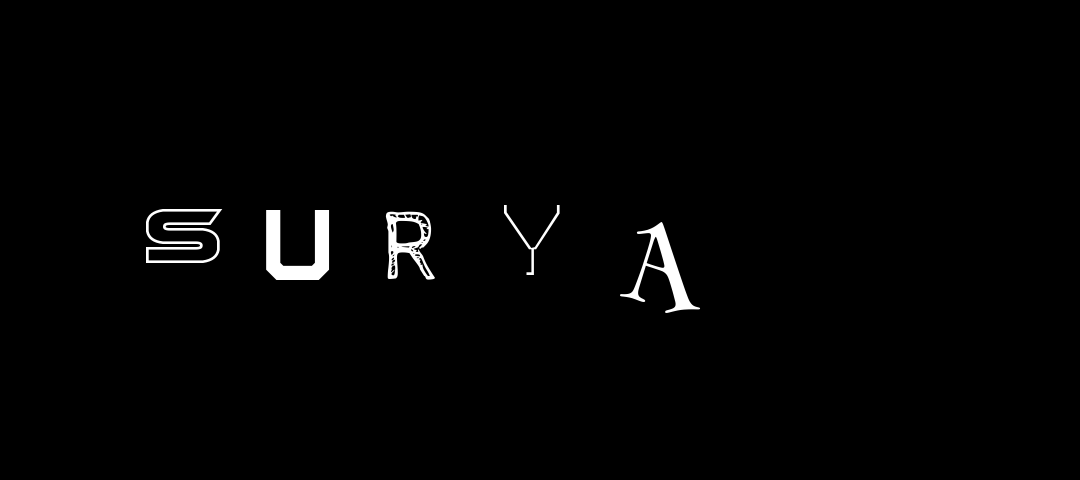

In [108]:
title = "SURYA"
gap = 120
title_card(title = "SURYA", offset_x = len(title)*gap - 200, offset_y = 50, gap_x = gap, font_size = 100)

In [109]:
font_ims = []
for i in range(0, 30, 1):
    font_ims.append(title_card(title = "YOUR TITLE HERE", offset_x = 500, offset_y = 50, gap_x = 70, font_size = 60))
font_ims[0].save(r'D:\ProjectFiles\loki_title\output\title_1.gif',
               save_all=True, append_images=font_ims[1:], optimize=False, duration=600, loop=0)

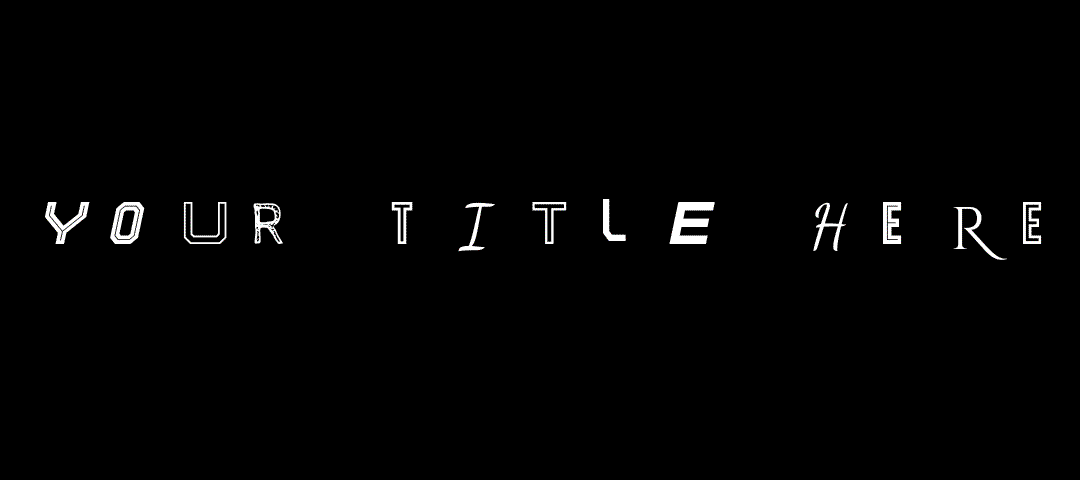

In [110]:
Img(filename=r"D:\ProjectFiles\loki_title\output\title_1.gif")

# Just Loki Fonts

In [65]:
# loki fonts
loki_fnts = [
    r"dameron_font\dameron.ttf",
    r"old_english_text_mt_font\OLD.ttf",
    r"arb_85_poster_font\ARB 85 Poster Script JAN-39 FRE.ttf"
]

loki_fonts = [os.path.abspath(os.path.join(os.getcwd(), r"..\fonts", font)) for font in loki_fnts]
print(loki_fonts)

['D:\\ProjectFiles\\loki_title\\fonts\\dameron_font\\dameron.ttf', 'D:\\ProjectFiles\\loki_title\\fonts\\old_english_text_mt_font\\OLD.ttf', 'D:\\ProjectFiles\\loki_title\\fonts\\arb_85_poster_font\\ARB 85 Poster Script JAN-39 FRE.ttf']


In [73]:
font_ims = []
for i in range(0, 30, 1):
    font_ims.append(title_card(title = "LOKI", offset_x = 400, offset_y = 50, gap_x = 150, font_size = 100, fonts=loki_fonts))
font_ims[0].save(r'D:\ProjectFiles\loki_title\output\title_2.gif',
               save_all=True, append_images=font_ims[1:], optimize=False, duration=600, loop=0)

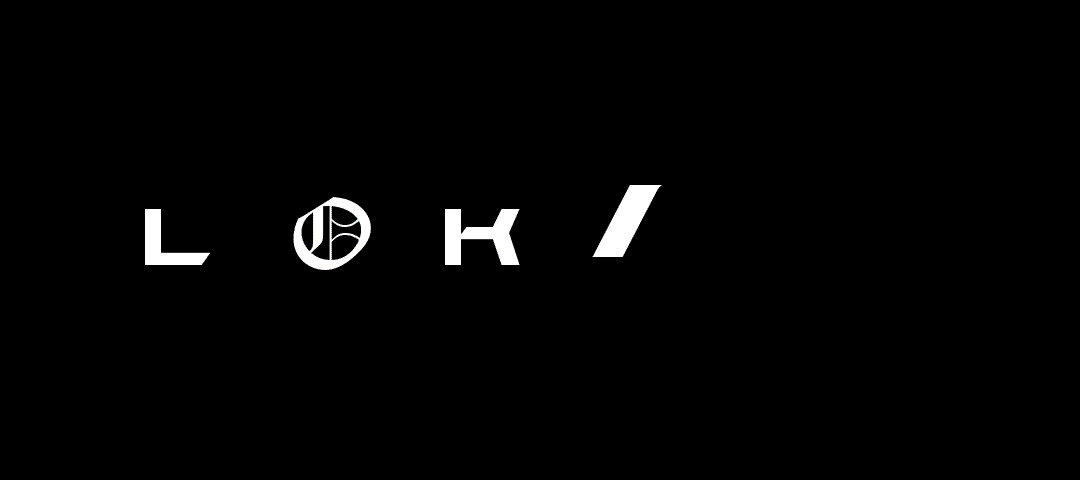

In [74]:
Img(filename=r"D:\ProjectFiles\loki_title\output\title_2.gif")

In [62]:
os.getcwd()

'D:\\ProjectFiles\\loki_title\\scripts'